<a href="https://colab.research.google.com/github/larrythl/Employee-Churn-Prediction/blob/main/Employee_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Preparation

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/690Project/Employee.csv")
#This data file is downloaded from https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset/data

In [ ]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
df.shape

(4653, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [ ]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


##Data Cleaning

In [ ]:
#Check Null values
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [ ]:
#Check unique values
categories = ['Gender', 'EverBenched', 'Education','City']
for i in categories:
  print(i,":",df[i].unique())

Gender : ['Male' 'Female']
EverBenched : ['No' 'Yes']
Education : ['Bachelors' 'Masters' 'PHD']
City : ['Bangalore' 'Pune' 'New Delhi']


##Data Visulization & Exploratory Analysis

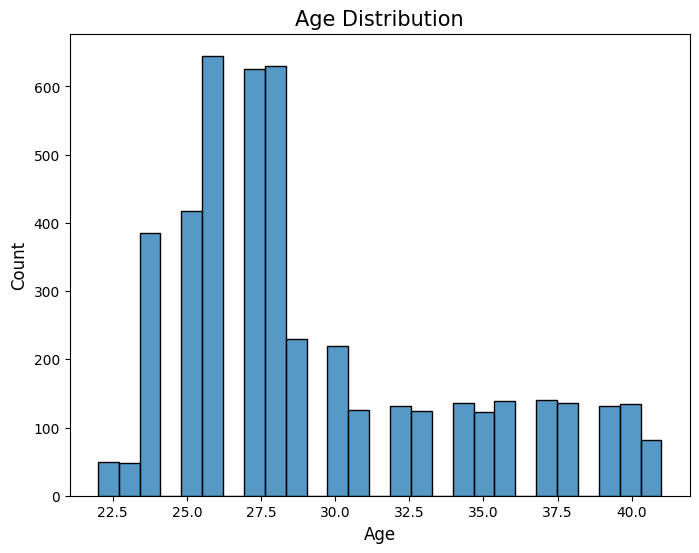

In [ ]:
plt.figure(figsize=(8, 6))

sns.histplot(df['Age'])

plt.title('Age Distribution',fontsize=15)
plt.xlabel('Age',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.show()

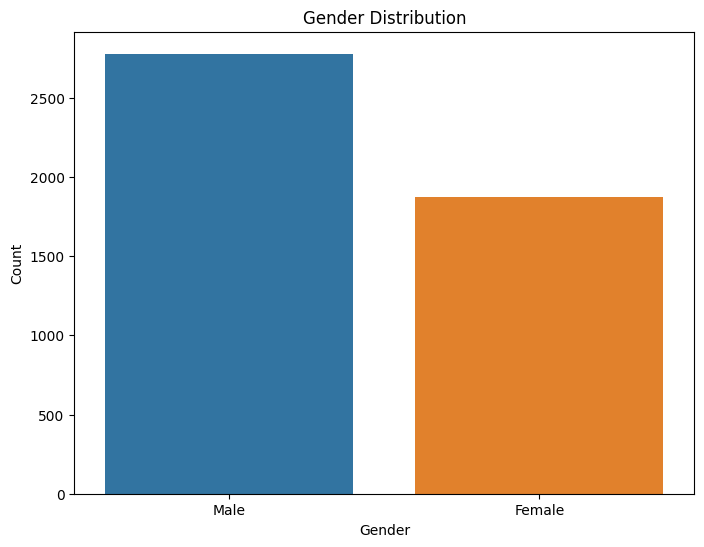

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(data=df, x='Gender')

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

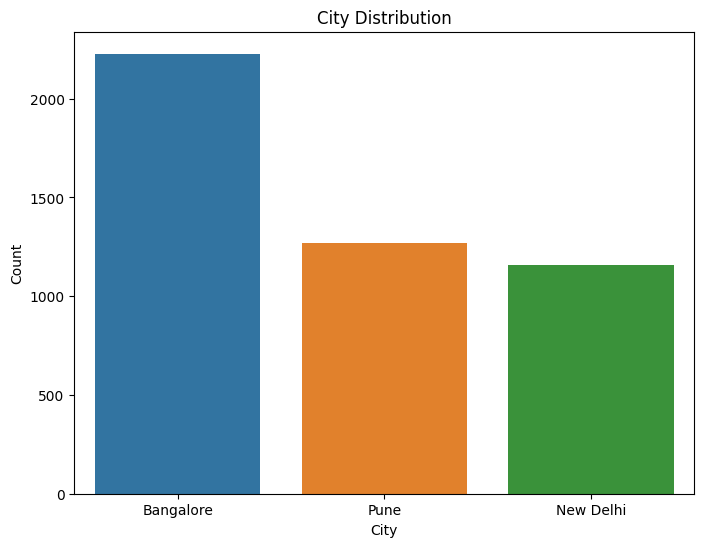

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(data=df, x='City')

plt.title('City Distribution')
plt.xlabel('City')
plt.ylabel('Count')

plt.show()

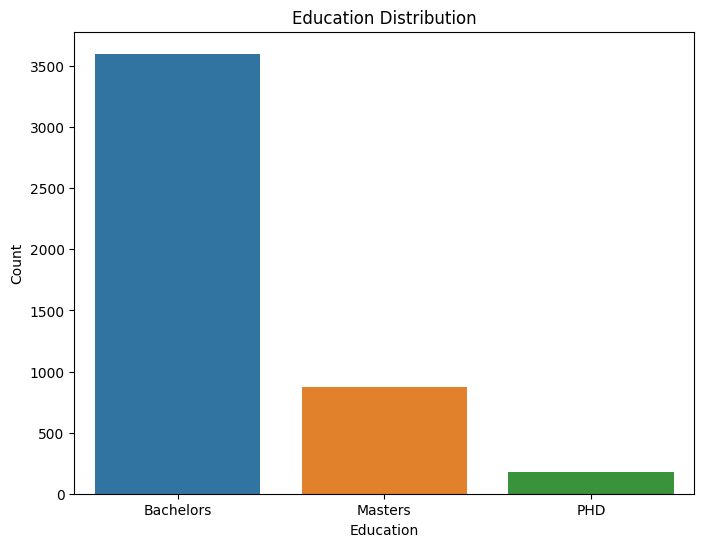

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(data=df, x='Education')

plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')

plt.show()

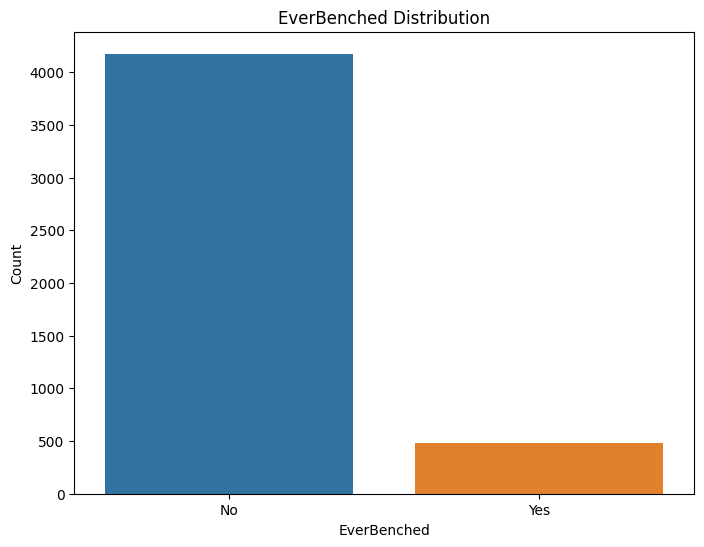

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(data=df, x='EverBenched')

plt.title('EverBenched Distribution')
plt.xlabel('EverBenched')
plt.ylabel('Count')

plt.show()

<Axes: xlabel='Education', ylabel='count'>

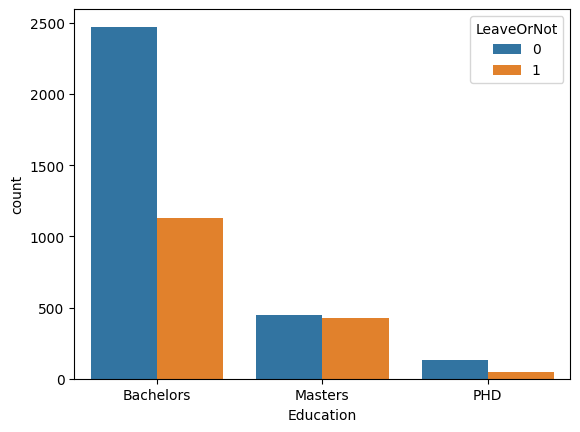

In [ ]:
sns.countplot(data=df, x= df["Education"], hue="LeaveOrNot")

<Axes: xlabel='Gender', ylabel='count'>

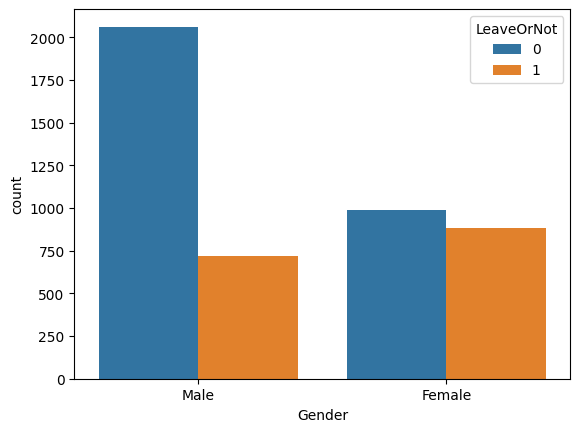

In [ ]:
sns.countplot(data=df, x= df["Gender"], hue="LeaveOrNot")

<Axes: xlabel='City', ylabel='count'>

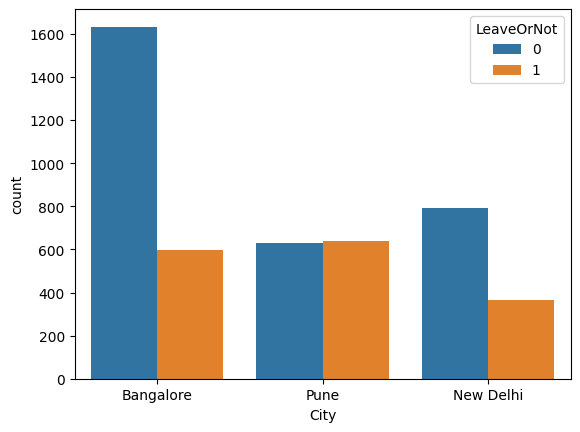

In [ ]:
sns.countplot(data=df, x= df["City"], hue="LeaveOrNot")

<Axes: xlabel='EverBenched', ylabel='count'>

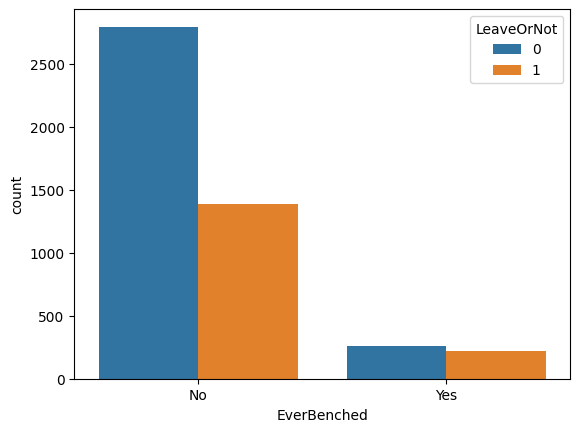

In [ ]:
sns.countplot(data=df, x= df["EverBenched"], hue="LeaveOrNot")

##Data Processing

###One-hot Encoding

In [ ]:
#Split features and the target variable
X= df.drop(["LeaveOrNot"], axis = 1)
y = df['LeaveOrNot']

In [ ]:
#Filter out numerical columns
numerical = X.drop(['Gender', 'EverBenched', 'Education','City'], axis = 1)
numerical.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain
0,2017,3,34,0
1,2013,1,28,3
2,2014,3,38,2
3,2016,3,27,5
4,2017,3,24,2


In [ ]:

categorical = X.filter(['Gender', 'EverBenched', 'Education','City'], axis = 1)
categorical.head()

,Gender,EverBenched,Education,City
0,Male,No,Bachelors,Bangalore
1,Female,No,Bachelors,Pune
2,Female,No,Bachelors,New Delhi
3,Male,No,Masters,Bangalore
4,Male,Yes,Masters,Pune


In [ ]:
cat_encoded = pd.get_dummies(categorical,drop_first=True)
cat_encoded.head()

,Gender_Male,EverBenched_Yes,Education_Masters,Education_PHD,City_New Delhi,City_Pune
0,1,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,1,0
3,1,0,1,0,0,0
4,1,1,1,0,0,1


In [ ]:
X = pd.concat([numerical, cat_encoded], axis = 1)

###Split training and testing set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3722, 10), (3722,), (931, 10), (931,))

###SMOTE balancing

In [ ]:
from imblearn.over_sampling import SMOTE
sm= SMOTE(sampling_strategy="minority", random_state=42)
X_train_smote, y_train_smote= sm.fit_resample(X_train, y_train)

###Standard Scale

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Modelling

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFmodel = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
RFmodel.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = RFmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       610
           1       0.82      0.73      0.77       321

    accuracy                           0.85       931
   macro avg       0.84      0.82      0.83       931
weighted avg       0.85      0.85      0.85       931

accuracy_score : 0.8528464017185822


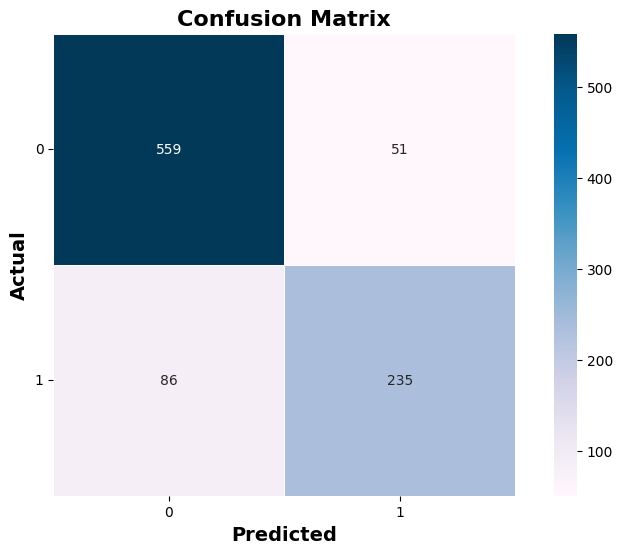

In [ ]:
#Model Evaluation

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


print(classification_report(y_test,y_pred))
print("accuracy_score :",accuracy_score(y_test, y_pred))

#Confusion Matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))

sns.heatmap(
    cm, annot=True, fmt='d', cmap='PuBu', linewidths=0.4, square=True, cbar=True,
    xticklabels=["0", "1"],
    yticklabels=["0", "1"]
)

plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.yticks(rotation=360)

plt.show()

##XGB classifier

In [ ]:
from xgboost import XGBClassifier

xgbc= XGBClassifier()
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgbc.predict(X_test)

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       610
           1       0.85      0.72      0.78       321

    accuracy                           0.86       931
   macro avg       0.86      0.82      0.84       931
weighted avg       0.86      0.86      0.86       931

accuracy_score : 0.8582169709989259


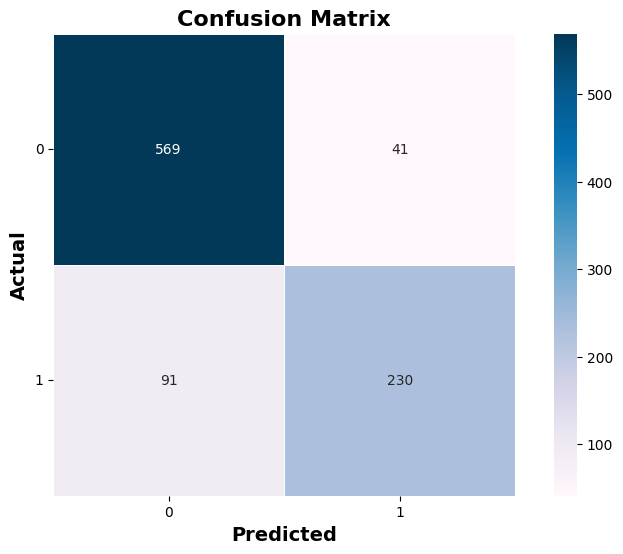

In [ ]:
#Model Evaluation

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


print(classification_report(y_test,y_pred))
print("accuracy_score :",accuracy_score(y_test, y_pred))

#Confusion Matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))

sns.heatmap(
    cm, annot=True, fmt='d', cmap='PuBu', linewidths=0.4, square=True, cbar=True,
    xticklabels=["0", "1"],
    yticklabels=["0", "1"]
)

plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.yticks(rotation=360)

plt.show()

##Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LRmodel= LogisticRegression()
LRmodel.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = LRmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       610
           1       0.71      0.44      0.54       321

    accuracy                           0.74       931
   macro avg       0.73      0.67      0.68       931
weighted avg       0.74      0.74      0.73       931

accuracy_score : 0.7443609022556391


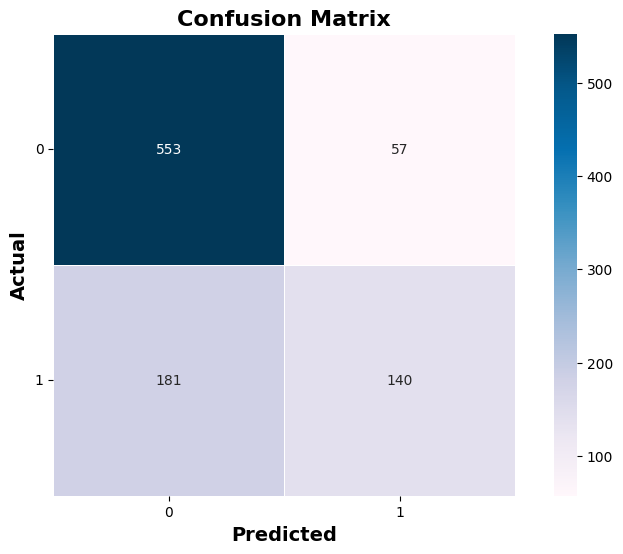

In [ ]:
#Model Evaluation

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


print(classification_report(y_test,y_pred))
print("accuracy_score :",accuracy_score(y_test, y_pred))

#Confusion Matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))

sns.heatmap(
    cm, annot=True, fmt='d', cmap='PuBu', linewidths=0.4, square=True, cbar=True,
    xticklabels=["0", "1"],
    yticklabels=["0", "1"]
)

plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.yticks(rotation=360)

plt.show()

##SVM

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

svc = svm.SVC()

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['linear','rbf' ]
    }
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1],
                         'kernel': ['linear', 'rbf']})

In [ ]:
y_pred = grid_search.predict(X_test)

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       610
           1       0.91      0.66      0.77       321

    accuracy                           0.86       931
   macro avg       0.88      0.81      0.83       931
weighted avg       0.87      0.86      0.85       931

accuracy_score : 0.8614393125671321


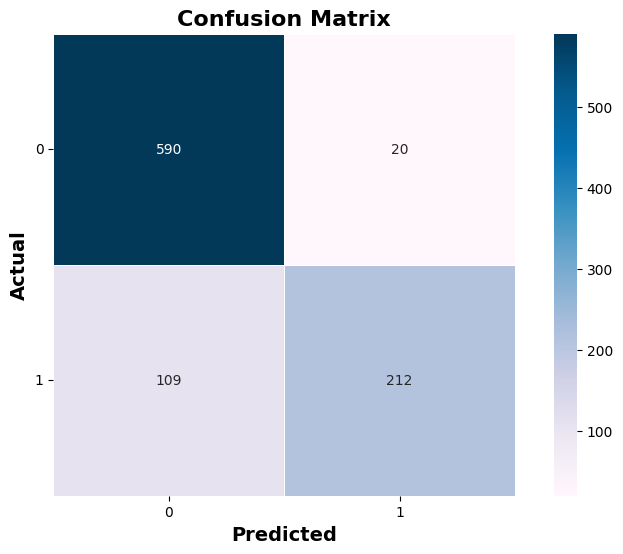

In [ ]:
#Model Evaluation

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


print(classification_report(y_test,y_pred))
print("accuracy_score :",accuracy_score(y_test, y_pred))

#Confusion Matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))

sns.heatmap(
    cm, annot=True, fmt='d', cmap='PuBu', linewidths=0.4, square=True, cbar=True,
    xticklabels=["0", "1"],
    yticklabels=["0", "1"]
)

plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.yticks(rotation=360)

plt.show()

##Neural Net

In [ ]:
import tensorflow as tf

#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.models import Model, Sequential
#from tensorflow.keras.layers import Dense, Dropout, Activation

def create_model(learning_rate, dropout_rate):
  #create sequential model
  model = Sequential()
  #adding dense layers
  model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(6, activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, activation='sigmoid'))
  #compiling the model
  adam = Adam(learning_rate=learning_rate)
  model.compile(loss="BinaryCrossentropy", optimizer=adam, metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])
  return model

In [ ]:
dropout_rate = 0.1
epochs = 50
batch_size = 4
learn_rate = 0.001

In [ ]:
model = create_model(learn_rate, dropout_rate)

In [ ]:
model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)

Epoch 1/50
745/745 [==============================] - 2s 2ms/step - loss: 0.6456 - accuracy: 0.6305 - precision_11: 0.4410 - recall_11: 0.2348 - auc_11: 0.5973 - val_loss: 0.5776 - val_accuracy: 0.7141 - val_precision_11: 0.6782 - val_recall_11: 0.2418 - val_auc_11: 0.7067
Epoch 2/50
745/745 [==============================] - 1s 2ms/step - loss: 0.5857 - accuracy: 0.6984 - precision_11: 0.6276 - recall_11: 0.3256 - auc_11: 0.7100 - val_loss: 0.5434 - val_accuracy: 0.7450 - val_precision_11: 0.6875 - val_recall_11: 0.4057 - val_auc_11: 0.7542
Epoch 3/50
745/745 [==============================] - 1s 2ms/step - loss: 0.5512 - accuracy: 0.7235 - precision_11: 0.6651 - recall_11: 0.4126 - auc_11: 0.7513 - val_loss: 0.5168 - val_accuracy: 0.7691 - val_precision_11: 0.7535 - val_recall_11: 0.4385 - val_auc_11: 0.7778
Epoch 4/50
745/745 [==============================] - 1s 2ms/step - loss: 0.5381 - accuracy: 0.7383 - precision_11: 0.6882 - recall_11: 0.4522 - auc_11: 0.7647 - val_loss: 0.4995

30/30 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       610
           1       0.89      0.66      0.76       321

    accuracy                           0.85       931
   macro avg       0.87      0.81      0.83       931
weighted avg       0.86      0.85      0.85       931

accuracy_score : 0.8539205155746509


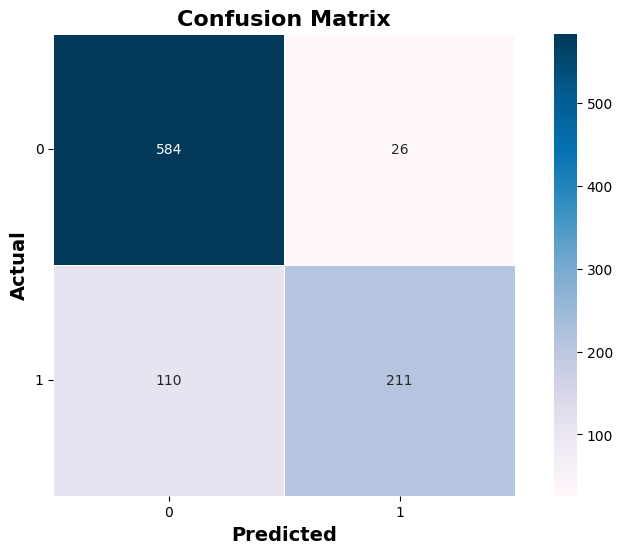

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the values from the test dataset
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32") # Convert probabilities to binary output

print(classification_report(y_test,y_pred_classes))
print("accuracy_score :",accuracy_score(y_test, y_pred_classes))
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 6))

sns.heatmap(
    cm, annot=True, fmt='d', cmap='PuBu', linewidths=0.4, square=True, cbar=True,
    xticklabels=["0", "1"],
    yticklabels=["0", "1"]
)

plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.yticks(rotation=360)

plt.show()